# Principle Component Analysis


In [1]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

#importing the dataset as a dataframe
df = pd.read_csv("taxis.csv").dropna()

## Pre-Processing
Before we can run PCA, we need to pre-process the data and encode labels. 

In [2]:
def transform(feature):
    le=preprocessing.LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [3]:
#Pull out the categorical variables
cat_df=df.select_dtypes(include='object')
cat_df.columns

#encode the categorical columns
for col in cat_df.columns:
    transform(col)

['2019-02-28 23:29:03' '2019-03-01 00:03:29' '2019-03-01 00:08:32' ...
 '2019-03-31 22:51:53' '2019-03-31 23:15:03' '2019-03-31 23:43:45']
['2019-02-28 23:32:35' '2019-03-01 00:13:32' '2019-03-01 00:29:47' ...
 '2019-03-31 22:55:10' '2019-03-31 23:27:12' '2019-04-01 00:13:58']
['green' 'yellow']
['cash' 'credit card']
['Allerton/Pelham Gardens' 'Alphabet City' 'Astoria' 'Auburndale'
 'Battery Park' 'Battery Park City' 'Bay Ridge' 'Bayside' 'Bedford'
 'Bedford Park' 'Belmont' 'Bensonhurst East' 'Bensonhurst West'
 'Bloomingdale' 'Boerum Hill' 'Borough Park' 'Briarwood/Jamaica Hills'
 'Brighton Beach' 'Bronx Park' 'Bronxdale' 'Brooklyn Heights'
 'Brownsville' 'Bushwick North' 'Bushwick South' 'Cambria Heights'
 'Canarsie' 'Carroll Gardens' 'Central Harlem' 'Central Harlem North'
 'Central Park' 'Chinatown' 'Claremont/Bathgate' 'Clinton East'
 'Clinton Hill' 'Clinton West' 'Co-Op City' 'Cobble Hill'
 'Columbia Street' 'Coney Island' 'Crotona Park East'
 'Crown Heights North' 'Crown Height

The next step is to select which features we want to use with PCA and standardize them.

In [4]:
#Standardizing features
sc = StandardScaler()
X = sc.fit_transform(df.drop('distance',axis=1))
y = df['distance'].to_numpy()

#Confirm the new mean and standard deviation of the dataset
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


## Split into Train and Test data
To apply PCA, the data must be split into "training" and "test" data.

In [5]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 40)

X_train

array([[ 0.23326723,  0.23270214, -0.45022689, ...,  0.11611009,
        -0.02072309,  0.07309971],
       [-0.10047342, -0.09975267, -0.45022689, ..., -1.30327595,
        -0.02072309, -1.93381961],
       [-0.53066457, -0.5306316 , -0.45022689, ...,  0.13430735,
        -0.02072309,  0.07309971],
       ...,
       [ 0.75059264,  0.75380319, -0.45022689, ..., -0.17504602,
         2.09904819,  0.07309971],
       [-1.18006139, -1.17968401, -0.45022689, ..., -1.39426223,
        -2.14049437, -1.93381961],
       [-0.54546095, -0.54648882, -0.45022689, ..., -0.88473904,
        -0.02072309,  0.07309971]])

We can decide the number of components we need in the output, but it is more effictive to specify the minimum variation that we want to be retained and allow the model to provide the number of components.

In [6]:
# Make an instance of the model and specify that 90% of the variance needs to be retained
n = 90
pca = PCA(n/100)

#Fit the model with data
pca.fit(X_train)

print('To retain',n,'% of the variation, we needed',pca.n_components_,'components')

To retain 90 % of the variation, we needed 8 components


In [7]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)

(4756, 8)
(1586, 8)


## Impact Comparison across Regressors

LinearRegression() PCA:  LinearRegression()  MSE:  2.28181
KNeighborsRegressor(n_neighbors=4) PCA:  KNeighborsRegressor(n_neighbors=4)  MSE:  2.58786
DecisionTreeRegressor(max_depth=4) PCA:  DecisionTreeRegressor(max_depth=4)  MSE:  2.96848
SVR() PCA:  SVR()  MSE:  2.07881


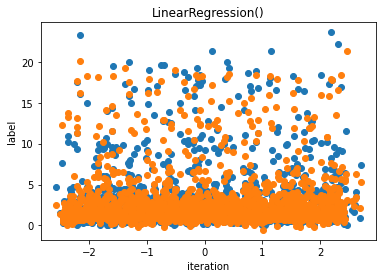

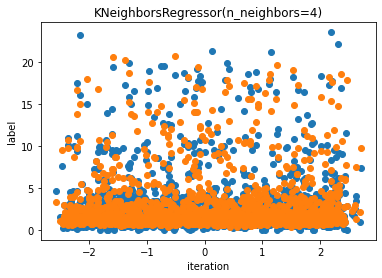

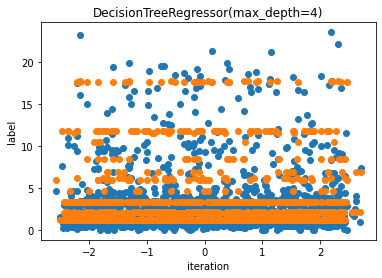

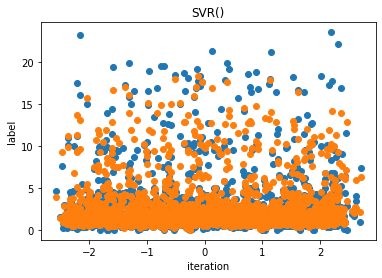

In [8]:
#Load models
lin_reg = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=4)
dt = DecisionTreeRegressor(max_depth=4)
svm = SVR()

models = [lin_reg,knn,dt,svm]

#Visualize each model
for model in models:
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    print(model, "PCA: ", model," MSE: ", np.round(mean_squared_error(y_test, y_pred),5))
    for i in range(1, X_test_pca.shape[1]):
        if i == 1:
            fig,ax = plt.subplots(1,1)
            ax.scatter(X_test_pca[:,i], y_test, label = 'predicted')
            ax.scatter(X_test_pca[:,i], y_pred, label = 'actual')
            ax.set_title(model)
            ax.set_xlabel('iteration')
            ax.set_ylabel('label')

Linear regression and knn did a decent job of matching the training data. As expected, decision tree produced results in lines with each level of the tree. PCA significantly negatively impacted SVM's ability to predict outcomes.

## Impact Comparison across Classifiers

In [12]:
accuracy = {'Model': ['Logistic Regression', 'Decision Tree - Gini', 'Decision Tree - Entropy', 'K Nearest Neighbors', 'Naive Bayes', 'SVM'], 
               'Accuracy - no PCA (%)': [90, 85, 85, 85, 87, 87], 
               'Accuracy - PCA (%)': [87, 94, 94, 90, 89, 92]
              }

acc = pd.DataFrame(data=accuracy)
acc

,Model,Accuracy - no PCA (%),Accuracy - PCA (%)
0,Logistic Regression,90,87
1,Decision Tree - Gini,85,94
2,Decision Tree - Entropy,85,94
3,K Nearest Neighbors,85,90
4,Naive Bayes,87,89
5,SVM,87,92


In [13]:
acc = acc.set_index('Model')

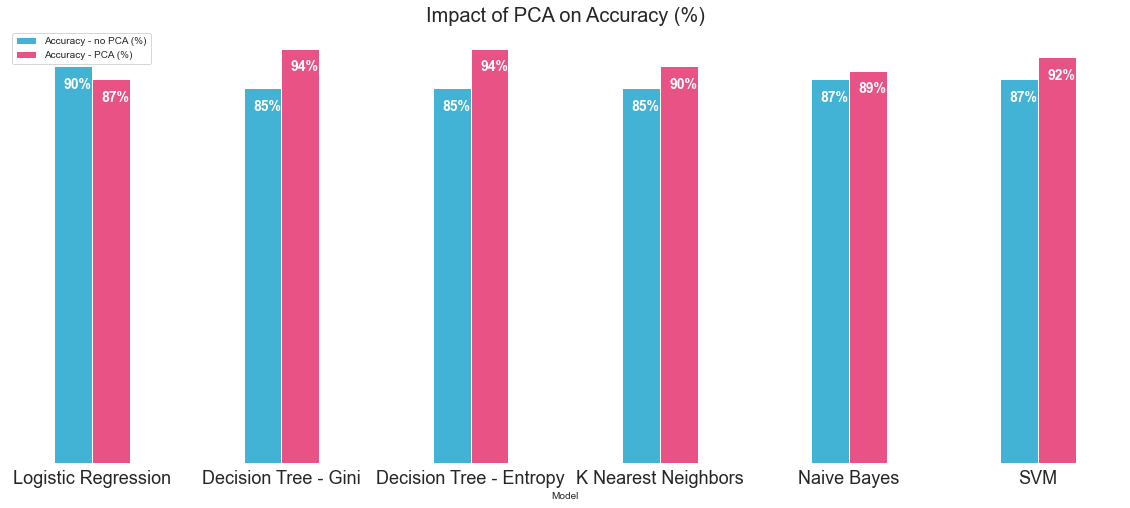

In [18]:
sns.set_style(style='white')
ax = acc.plot(kind='bar', figsize=(20,8), width=0.4, color=['#42b3d5', '#e85285'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

ax.yaxis.grid()
ax.get_yaxis().set_visible(False)
plt.title('Impact of PCA on Accuracy (%)', fontsize=20)

for n in range(2):
    for index, val in enumerate(acc.iloc[:,n].transpose()): 
        label=str(val) + '%'
        
        if n==0:
            ax.annotate(label, xy=(index-0.15, val-5), color='#ffffff', fontsize=14, fontweight='bold')
        elif n==1:
            ax.annotate(label, xy=(index+0.05, val-5), color='#ffffff', fontsize=14, fontweight='bold')

plt.show()

***All of the above the accuracy increases with PCA!***

In [19]:
time = {'Model': ['Logistic Regression', 'Decision Tree - Gini', 'Decision Tree - Entropy', 'K Nearest Neighbors', 'Naive Bayes', 'SVM'],
                  'Train Time - no PCA (s) ': [0.03865957260131836, 0.013057708740234375, 0.0, 0.0147,0.013001441955566406, 0.07117104530334473],
                  'Train Time - PCA (s) ': [0.014000177383422852, 0.008437395095825195, 0.01125645637512207, 0.0105, 0.000,0.5437479019165039]}

tm = pd.DataFrame(data=time)
tm

,Model,Train Time - no PCA (s),Train Time - PCA (s)
0,Logistic Regression,0.038660,0.014000
1,Decision Tree - Gini,0.013058,0.008437
2,Decision Tree - Entropy,0.000000,0.011256
3,K Nearest Neighbors,0.014700,0.010500
4,Naive Bayes,0.013001,0.000000
5,SVM,0.071171,0.543748


In [20]:
tm = tm.set_index('Model')

Text(0.5, 1.0, 'Impact of PCA on Train Time (Seconds)')

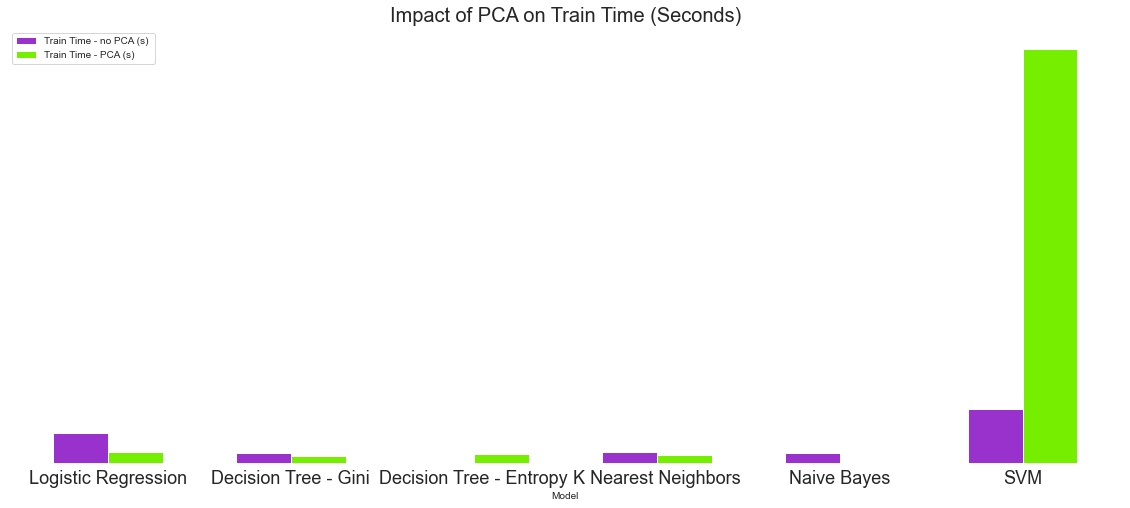

In [21]:
ax = tm.plot(kind='bar', figsize=(20,8), width=0.6, color=['#9932CC', '#76EE00'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)
ax.yaxis.grid()
ax.get_yaxis().set_visible(False)
plt.title('Impact of PCA on Train Time (Seconds)', fontsize=20)



***In  SVM, train time improved with PCA.
In logistic tree, decision tree and nearest neighbours train time doesnot increases after PCA.***